<a href="https://colab.research.google.com/github/ingcarlosleon/data-Mapainversiones/blob/main/scripts/exploratory-data-analysis/Avance1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
**TechSprint para una mayor transparencia gubernamental**

📑 **Planteamiento del problema 4:** ¿Cómo podemos mejorar la identificación de brechas en infraestructuras y desarrollo en la planificación de inversiones públicas y privadas para apoyar la resiliencia climática, la igualdad de género, la buena gobernanza y el desarrollo sostenible?

📘 **Más sobre el problema:** https://idb-air-techsprint.vercel.app/problem-statements/planteamiento-del-problema-4

📚 **Equipo:** 2

🧑 **Integrantes:**
> Alice Raquel Rambo

> David Arnaldo	Durand Velasquez

> Doug McCalmont

> Milton Javier Mahecha Silva

> Carlos Julio León Caicedo

👩 **Mentores BID**:
> Carole Alazki (**Product Owner**)

> Anyela Milena (**Arquitecta de Datos**)

📅 Agosto de 2024
---

**🚀 Avance 1. Análisis exploratorio de datos:** El objetivo de este avance es realizar un análisis exploratorio de los datos para identificar las características más relevantes, con el fin de reducir la dimensionalidad y mejorar la capacidad de generalización del modelo a desarrollar. Se abordarán y corregirán los problemas detectados en los datos de [Proyectos y Obras de Inversión de la República Argentina](https://idb-air-techsprint.vercel.app/datasets/investment-projects-and-works-arg), y se estandarizará y recomendará una estructurade datos que permita la replicación del modelo con datos de otros países, fomentaando su aplicabilidad y robustez en diferentes contextos geográficos.

Realizamos un análisis de los conjuntos de datos y columnas existentes contestando las siguientes preguntas:

*   ¿Cuáles son las estadísticas resumidas del conjunto de datos?
*   ¿Hay valores faltantes en el conjunto de datos?
*   ¿Se pueden identificar patrones de ausencia?
*   ¿Hay valores atípicos en el conjunto de datos?
*   ¿Cuál es la cardinalidad de las variables categóricas?
*   ¿Existen distribuciones sesgadas en el conjunto de datos?
*   ¿Necesitamos aplicar alguna transformación no lineal?
*   ¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).
*   ¿Hay correlación entre las variables dependientes e independientes?
*   ¿Cómo se distribuyen los datos en función de diferentes categorías?
*   ¿Existen patrones o agrupaciones (clusters) en los datos con características similares?
*   ¿Hay desequilibrio en las clases de la variable objetivo?

In [ ]:
!pip install pandas requests frictionless

###**Analísis de los Conjuntos de Datos de Argentina**



**Obtener los Datos**: Cargamos los tres conjuntos de datos desde las fuentes CSV.

Fuente: https://idb-air-techsprint.vercel.app/datasets/investment-projects-and-works-arg

In [2]:
import pandas as pd
import requests
from io import StringIO

# URLs de los datasets desde el JSON
url_spatial_data_works = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/OBRAS/CSV/2024/06/19/dataset_mop.csv"
url_investment_projects = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/PROYECTOS/CSV/2024/06/19/dataset_proyectosmop.csv"
url_datos_espaciales = "https://air.portaljs.com/opendata/ARG/MAPAINVDB/OPENDATA/DATOS_ESPACIALES/CSV/2024/06/25/dataset_geojson.csv"

# Función para cargar los datasets desde la URL
def load_csv_from_url(url):
    response = requests.get(url)
    response.raise_for_status()  # Nos Aseguramos que la solicitud fue exitosa
    data = response.content.decode('utf-8')
    return pd.read_csv(StringIO(data))

# Cargar los datasets en DataFrames de pandas
df_spatial_data_works = load_csv_from_url(url_spatial_data_works)
df_investment_projects = load_csv_from_url(url_investment_projects)
df_datos_espaciales = load_csv_from_url(url_datos_espaciales)

**Dataset: Datos espaciales - Obras de la República Argentina (spatial-data-works)**

Contiene la información espacial de las Obras de la República Argentina


**<center>🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>**

In [3]:
# Obtener información general sobre el DataFrame
df_spatial_data_works.info()
print("\nSpatial Data Works - Describe\n")
df_spatial_data_works.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7317 entries, 0 to 7316
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   idproyecto                      7317 non-null   int64  
 1   numeroobra                      7317 non-null   object 
 2   codigobapin                     7317 non-null   object 
 3   fechainicioanio                 7317 non-null   int64  
 4   fechafinanio                    7317 non-null   int64  
 5   nombreobra                      7317 non-null   object 
 6   descripicionfisica              7317 non-null   object 
 7   montototal                      7317 non-null   float64
 8   sectornombre                    7317 non-null   object 
 9   avancefinanciero                7317 non-null   float64
 10  avancefisico                    7317 non-null   float64
 11  entidadejecutoranombre          7317 non-null   object 
 12  duracionobrasdias               73

,idproyecto,fechainicioanio,fechafinanio,montototal,avancefinanciero,avancefisico,duracionobrasdias,codigo_bahra,organismo_financiador_prestamo
count,7.317000e+03,7317.000000,7317.000000,7.317000e+03,7317.000000,7317.000000,7317.000000,3.977000e+03,2.100000e+02
mean,7.230890e+08,2021.288916,2022.269373,5.918530e+08,71.909481,74.819638,351.468908,2.927189e+14,7.117020e+07
std,4.488914e+08,1.604703,1.181463,3.175574e+09,33.753074,35.889589,491.368452,3.037337e+14,5.210177e+08
min,1.610000e+03,2008.000000,2020.000000,1.000000e+00,0.000000,0.000000,1.000000,2.007000e+03,2.280000e+03
25%,1.001445e+07,2021.000000,2021.000000,1.154832e+07,45.170000,48.920000,120.000000,6.294029e+13,2.940000e+03
50%,1.003112e+09,2021.000000,2022.000000,3.604513e+07,90.000000,100.000000,181.000000,1.410527e+14,8.945000e+03
75%,1.003120e+09,2022.000000,2023.000000,1.637773e+08,100.000000,100.000000,386.000000,5.404902e+14,8.945000e+03
max,1.003131e+09,2024.000000,2029.000000,9.408170e+10,100.000000,100.000000,5568.000000,9.401400e+14,4.312100e+09


**<center>🤔¿Hay valores faltantes en el conjunto de datos?</center>**

In [4]:
#Verificamos si existen valores faltantes en nuestro conjunto
print("¿Hay valores faltantes en el conjunto de datos spatial-data-works?")
if (df_spatial_data_works.isna().values.any())==True:
  print("Sí")
else:
  print("No")

¿Hay valores faltantes en el conjunto de datos spatial-data-works?
Sí


In [5]:
import pandas as pd
# Calcular la cantidad de valores faltantes por columna
missing_values = df_spatial_data_works.isnull().sum()

# Filtrar las columnas con valores faltantes
missing_columns = missing_values[missing_values > 0]

# Calcular el porcentaje de valores faltantes por columna
missing_percentage = (missing_columns / len(df_spatial_data_works)) * 100

# Crear un DataFrame para mostrar los resultados
missing_data = pd.DataFrame({
    'Columna': missing_columns.index,
    'Valores Faltantes': missing_columns.values,
    'Porcentaje Faltante': missing_percentage.values
})

# Ordenar el DataFrame por porcentaje faltante en orden descendente
missing_data_sorted = missing_data.sort_values('Porcentaje Faltante', ascending=False)

# Mostrar el DataFrame ordenado
print(missing_data_sorted)

                          Columna  Valores Faltantes  Porcentaje Faltante
1         organismo_financiador_2               7312            99.931666
2  organismo_financiador_prestamo               7107            97.129971
0                    codigo_bahra               3340            45.647123
4                 contraparte_val                225             3.075031
3                 contraparte_key                182             2.487358
5                contraparte_cuit                182             2.487358
6           contraparte_modalidad                182             2.487358


Se presentan algunos valores faltantes de las columnas organismo_financiador_2, organismo_financiador_prestamo, entre otras que van desde el 99.93% hasta el 2.48%, a continuación se realiza un gráfico de barras para analizar las columnas con datos faltantes.

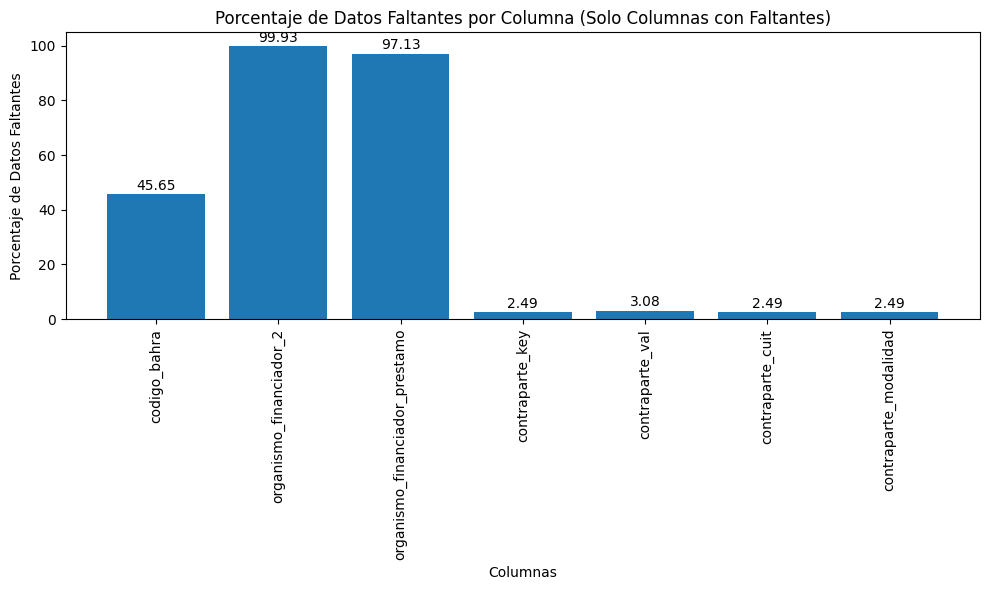

In [6]:
import matplotlib.pyplot as plt

# Calcular el porcentaje de datos faltantes por columna
missing_percentage = df_spatial_data_works.isnull().sum() * 100 / len(df_spatial_data_works)

# Filtrar las columnas con datos faltantes
missing_percentage_filtered = missing_percentage[missing_percentage > 0]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.bar(missing_percentage_filtered.index, missing_percentage_filtered.values)
plt.xlabel('Columnas')
plt.ylabel('Porcentaje de Datos Faltantes')
plt.title('Porcentaje de Datos Faltantes por Columna (Solo Columnas con Faltantes)')
plt.xticks(rotation=90)

# Agregar etiquetas con el valor faltante a cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [7]:
missing_percentage_filtered.index

Index(['codigo_bahra', 'organismo_financiador_2',
       'organismo_financiador_prestamo', 'contraparte_key', 'contraparte_val',
       'contraparte_cuit', 'contraparte_modalidad'],
      dtype='object')

**<center>🤔¿Se pueden identificar patrones de ausencia?</center>**

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5]),
 [Text(0.5, 0, 'idproyecto'),
  Text(1.5, 0, 'numeroobra'),
  Text(2.5, 0, 'codigobapin'),
  Text(3.5, 0, 'fechainicioanio'),
  Text(4.5, 0, 'fechafinanio'),
  Text(5.5, 0, 'nombreobra'),
  Text(6.5, 0, 'descripicionfisica'),
  Text(7.5, 0, 'montototal'),
  Text(8.5, 0, 'sectornombre'),
  Text(9.5, 0, 'avancefinanciero'),
  Text(10.5, 0, 'avancefisico'),
  Text(11.5, 0, 'entidadejecutoranombre'),
  Text(12.5, 0, 'duracionobrasdias'),
  Text(13.5, 0, 'objetivogeneral'),
  Text(14.5, 0, 'tipoproyecto'),
  Text(15.5, 0, 'nombredepto'),
  Text(16.5, 0, 'nombreprovincia'),
  Text(17.5, 0, 'codigo_bahra'),
  Text(18.5, 0, 'etapaobra'),
  Text(19.5, 0, 'tipomoneda'),
  Text(20.5, 0, 'url_perfil_obra'),
  Text(21.5, 0, 'programa_infraestructura'),
  Text(22.5, 0, 'organismo_financiador

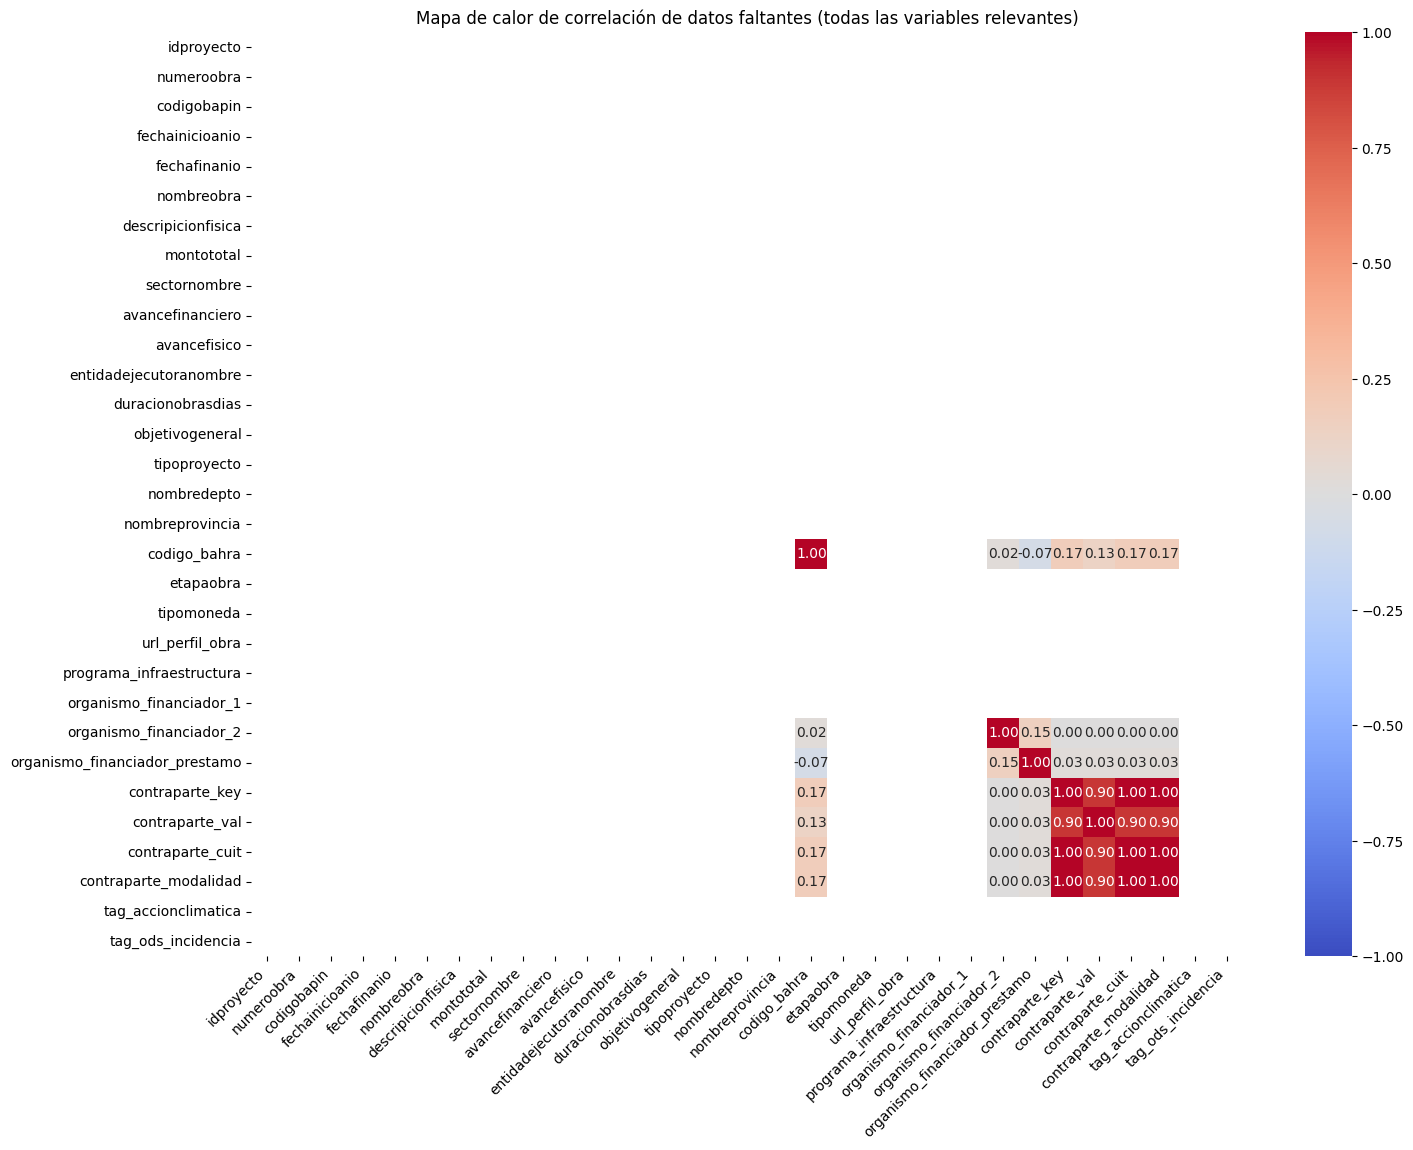

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generar la matriz de correlación de todas las variables relevantes con datos faltantes
Correlacion_Faltantes = df_spatial_data_works.isnull().corr()

# Aumentar el tamaño de la figura
plt.figure(figsize=(16, 12))

# Crear el mapa de calor con etiquetas rotadas en el eje X
sns.heatmap(Correlacion_Faltantes, cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación de datos faltantes (todas las variables relevantes)')

# Rotar las etiquetas del eje X para mejorar la legibilidad
plt.xticks(rotation=45, ha='right')

La matriz de correlación de datos faltantes generada nos puede ayudar a identificar patrones de ausencia en los datos, si dos o más variables muestran una alta correlación en los datos faltantes (es decir valores cercanos a 1 o -1), indica que tienden a faltar juntas, lo que sugiere un patrón de ausencia.

Sin embargo, antes de eliminar variables, es importante considerar lo siguiente:

*   **Relevancia de las Variables:** Si las variables son críticas para el análisis, se puede intentar imputar los valores faltantes en lugar de eliminar las variables.
*   **Impacto en el Modelo:** Considerar cómo la eliminación afectará el análisis o modelo posterior. Variables altamente correlacionadas en términos de datos faltantes pueden estar relacionadas conceptualmente, lo que podría influir en los resultados.

*   **Análisis Exploratorio:** Continuar con el análisis exploratorio, para determinar si la eliminación de estas variables realmente mejora la calidad de los datos y la interpretación de los resultados.


**<center>🤔¿Hay valores atípicos en el conjunto de datos?</center>**

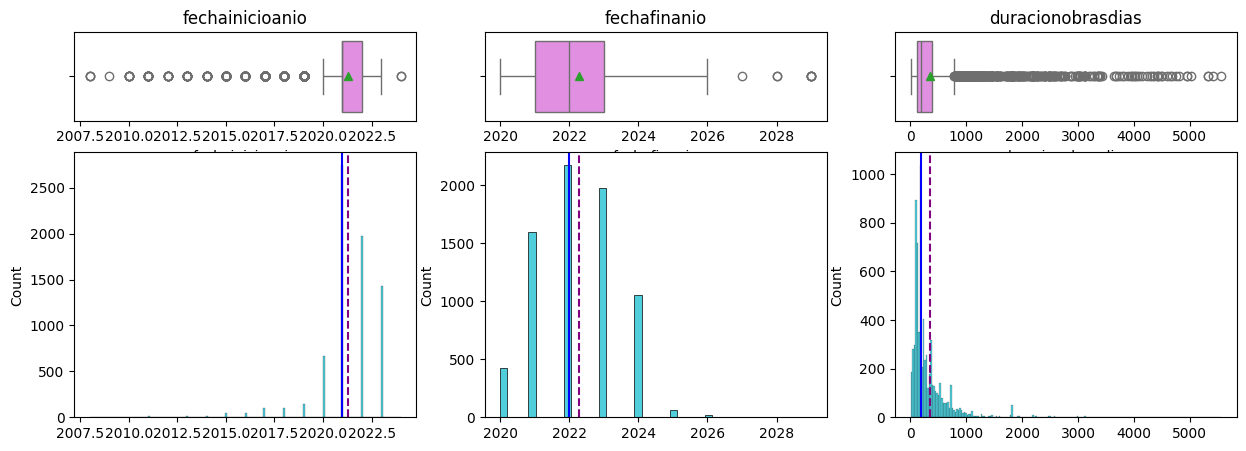

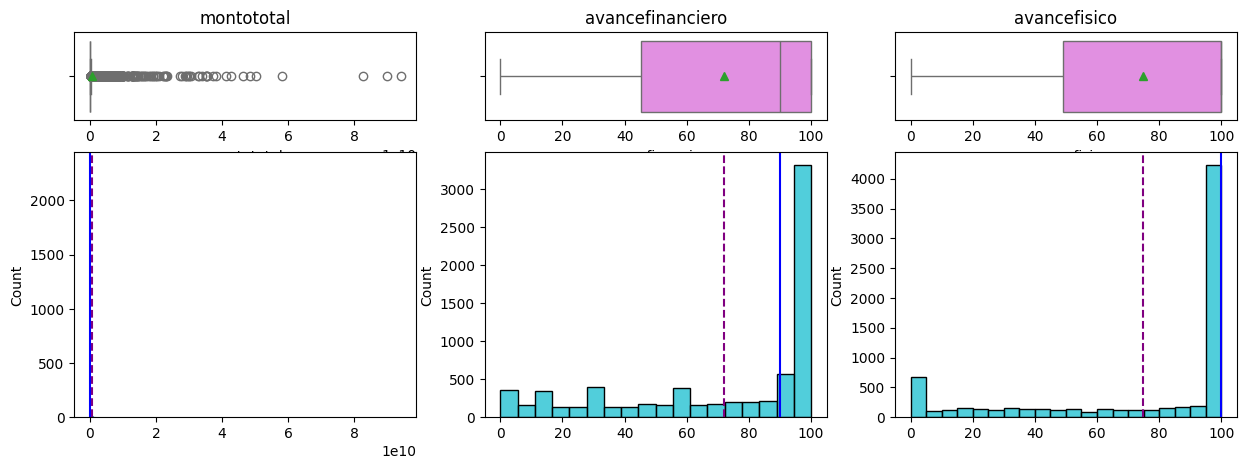

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import math  # Asegúrate de importar math

# Especificar las columnas importantes que deseas analizar
Cols_Importantes = ["fechainicioanio", "fechafinanio", "duracionobrasdias", "montototal", "avancefinanciero","avancefisico"]

def create_grid_of_plots(df, columns, figsize=(15, 5), bins=None):
    full_rows = math.floor(len(columns) / 3)
    last_row_elems = len(columns) % 3
    for i in range(0, full_rows * 3, 3):
        pltcols = columns[i:i + 3]
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=figsize, gridspec_kw={"height_ratios": (0.25, 0.75)})
        fig.subplots_adjust(hspace=0.18)
        for j in range(3):
            col = pltcols[j]
            ax = axes[0, j % 3]
            ax2 = axes[1, j % 3]
            feature = df[col]
            multi_histogram_boxplot(feature, ax, ax2, bins)
            ax.set_title(col).set_position([0.5, -3])
        plt.show()
    if last_row_elems > 0:
        pltcols = columns[len(columns) - last_row_elems:]
        if len(pltcols) == 1:
            single_histogram_boxplot(df, pltcols[0])
        else:
            fig, axes = plt.subplots(nrows=2, ncols=len(pltcols), figsize=(len(pltcols) * 5, 5), gridspec_kw={"height_ratios": (0.25, 0.75)})
            fig.subplots_adjust(hspace=0.15)
            for j in range(len(pltcols)):
                col = pltcols[j]
                ax = axes[0, j % len(pltcols)]
                ax2 = axes[1, j % len(pltcols)]
                feature = df[col]
                multi_histogram_boxplot(feature, ax, ax2, bins)
                ax.set_title(col).set_position([0.5, -3])
            plt.show()

def multi_histogram_boxplot(feature, ax, ax2, bins=None):
    sns.boxplot(feature, ax=ax, showmeans=True, color='violet', orient="h")
    if bins:
        sns.histplot(feature, kde=False, ax=ax2, bins=bins, color='tab:cyan')
    else:
        sns.histplot(feature, kde=False, ax=ax2, color='tab:cyan')
    ax2.set_xlabel('')
    ax2.axvline(np.mean(feature), color='purple', linestyle='--')
    ax2.axvline(np.median(feature), color='blue', linestyle='-')

def single_histogram_boxplot(df, col, figsize=(5, 5), bins=None):
    feature = df[col]
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, gridspec_kw={"height_ratios": (.25, .75)}, figsize=figsize)
    ax_box2.set_title(col).set_position([0.5, -3])
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet', orient="h")
    sns.histplot(feature, kde=False, ax=ax_hist2, bins=bins, color='tab:cyan') if bins else sns.histplot(feature, kde=False, ax=ax_hist2, color='tab:cyan')
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--')
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-')

warnings.filterwarnings("ignore")

# Llamar a la función para crear los gráficos solo para las variables importantes
create_grid_of_plots(df_spatial_data_works, Cols_Importantes)


**<center>🤔¿Cuál es la cardinalidad de las variables categóricas?</center>**

In [10]:
# prompt: ¿Cuál es la cardinalidad de las variables categóricas?

import pandas as pd
# Seleccionar solo las columnas categóricas
categorical_cols = df_spatial_data_works.select_dtypes(include=['object']).columns

# Calcular la cardinalidad de cada columna categórica
cardinality = df_spatial_data_works[categorical_cols].nunique()

# Crear un DataFrame para mostrar los resultados
cardinality_df = pd.DataFrame({
    'Variable': cardinality.index,
    'Cardinalidad': cardinality.values
})

# Ordenar el DataFrame por cardinalidad en orden descendente
cardinality_df_sorted = cardinality_df.sort_values('Cardinalidad', ascending=False)

# Mostrar el DataFrame ordenado
print(cardinality_df_sorted)


                    Variable  Cardinalidad
12           url_perfil_obra          7317
0                 numeroobra          7212
2                 nombreobra          6758
3         descripicionfisica          4988
6            objetivogeneral          4988
1                codigobapin          2895
17           contraparte_val          1707
8                nombredepto           418
18          contraparte_cuit           335
7               tipoproyecto           195
9            nombreprovincia            24
21        tag_ods_incidencia            18
5     entidadejecutoranombre            16
4               sectornombre             9
19     contraparte_modalidad             7
14   organismo_financiador_1             6
13  programa_infraestructura             5
20       tag_accionclimatica             4
10                 etapaobra             3
16           contraparte_key             3
15   organismo_financiador_2             2
11                tipomoneda             2


**<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos?</center>**

**<center>🤔¿Necesitamos aplicar alguna transformación no lineal?</center>**

**<center>🤔¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).</center>**

**<center>🤔¿Hay correlación entre las variables dependientes e independientes?</center>**

**<center>🤔¿Cómo se distribuyen los datos en función de diferentes categorías</center>**

**<center>🤔¿Existen patrones o agrupaciones (clusters) en los datos con características similares?</center>**

**<center>🤔¿Hay desequilibrio en las clases de la variable objetivo?</center>**

**Proyectos de Inversión de la República Argentina (url_investment_projects)**

Contiene información de los proyectos de obras de Inversión de La República Argentina

**<center>🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>**

**<center>🤔¿Hay valores faltantes en el conjunto de datos?</center>**

**<center>🤔¿Se pueden identificar patrones de ausencia?</center>**

**<center>🤔¿Hay valores atípicos en el conjunto de datos?</center>**

**<center>🤔¿Cuál es la cardinalidad de las variables categóricas?</center>**

**<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos?</center>**

**<center>🤔¿Necesitamos aplicar alguna transformación no lineal?</center>**

**<center>🤔¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).</center>**

**<center>🤔¿Hay correlación entre las variables dependientes e independientes?</center>**

**<center>🤔¿Cómo se distribuyen los datos en función de diferentes categorías</center>**

**<center>🤔¿Existen patrones o agrupaciones (clusters) en los datos con características similares?</center>**

**<center>🤔¿Hay desequilibrio en las clases de la variable objetivo?</center>**

**Obras de la República Argentina (url_datos_espaciales)**

Contiene información de las Obras de la República Argentina

**<center>🤔¿Cuáles son las estadísticas resumidas del conjunto de datos?</center>**

**<center>🤔¿Hay valores atípicos en el conjunto de datos?</center>**

**<center>🤔¿Cuál es la cardinalidad de las variables categóricas?</center>**

**<center>🤔¿Existen distribuciones sesgadas en el conjunto de datos?</center>**

**<center>🤔¿Necesitamos aplicar alguna transformación no lineal?</center>**

**<center>🤔¿Se identifican tendencias temporales? (En caso de que el conjunto incluya una dimensión de tiempo).</center>**

**<center>🤔¿Hay correlación entre las variables dependientes e independientes?</center>**

**<center>🤔¿Cómo se distribuyen los datos en función de diferentes categorías</center>**

**<center>🤔¿Existen patrones o agrupaciones (clusters) en los datos con características similares?</center>**

**<center>🤔¿Hay desequilibrio en las clases de la variable objetivo?</center>**